## 데이터 전처리

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
df = pd.read_csv("C:/Users/dhckd/Study/CodingWorld/Codestates/Projects/project1/dataset/vgames2.csv", index_col = 0)

In [4]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [6]:
max(df.NA_Sales)

'90K'

### 위처럼 숫자가 메트릭 표현으로 된 상태를 볼 수 있다. 이후 그래프를 그리는 과정 등에서 원활한 사용을 위해 일반 숫자 표현으로 바꿔줄 필요가 있다.

- 먼저 object형을 float형으로 변환하고, 메트릭형태도 함께 변환

- 숫자 형태 변환 함수

In [7]:
def trans_num(i):
    metric = ['T', 'B', 'M', 'K']
    if i[-1] in metric:
        if i[-1] == 'T':
            x = float(i[:-1])*1000000000000
            return x
        elif i[-1] == 'B':
            x = float(i[:-1])*1000000000
            return x
        elif i[-1] == 'M':
            x = float(i[:-1])*1000000
            return x
        else: # K의 경우
            x = float(i[:-1])*1000
            return x
    else:
        return float(i)

In [8]:
df['NA_Sales'] = df['NA_Sales'].apply(trans_num)
df['EU_Sales'] = df['EU_Sales'].apply(trans_num)
df['JP_Sales'] = df['JP_Sales'].apply(trans_num)
df['Other_Sales'] = df['Other_Sales'].apply(trans_num)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.3+ MB


- Sales 컬럼 4개 모두 형변환 완료

### 결측값 확인

In [10]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

### Year, genre, publisher 위 셋 컬럼에서 결측값 확인
- year와 genre는 연도별 트렌드 확인 시 필요
- publisher는 이후 회사별 분석을 할 때 필요

### 위 세 개의 결측값들을 확인해서, 전체 데이터에 영향을 줄 수 있는 데이터를 포함하는지 확인하고자 한다.
### 예를 들어 EU_Sales가 매우 높은 게임이라면 중요한 데이터라고 판단할 수 있다. 이러한 데이터에 연도, 장르 등이 결측 되어있다면 해당 결측치는 지우지 말고 활용할 방안을 찾아야 할 것이다.

### 결측값 시각화

<AxesSubplot:>

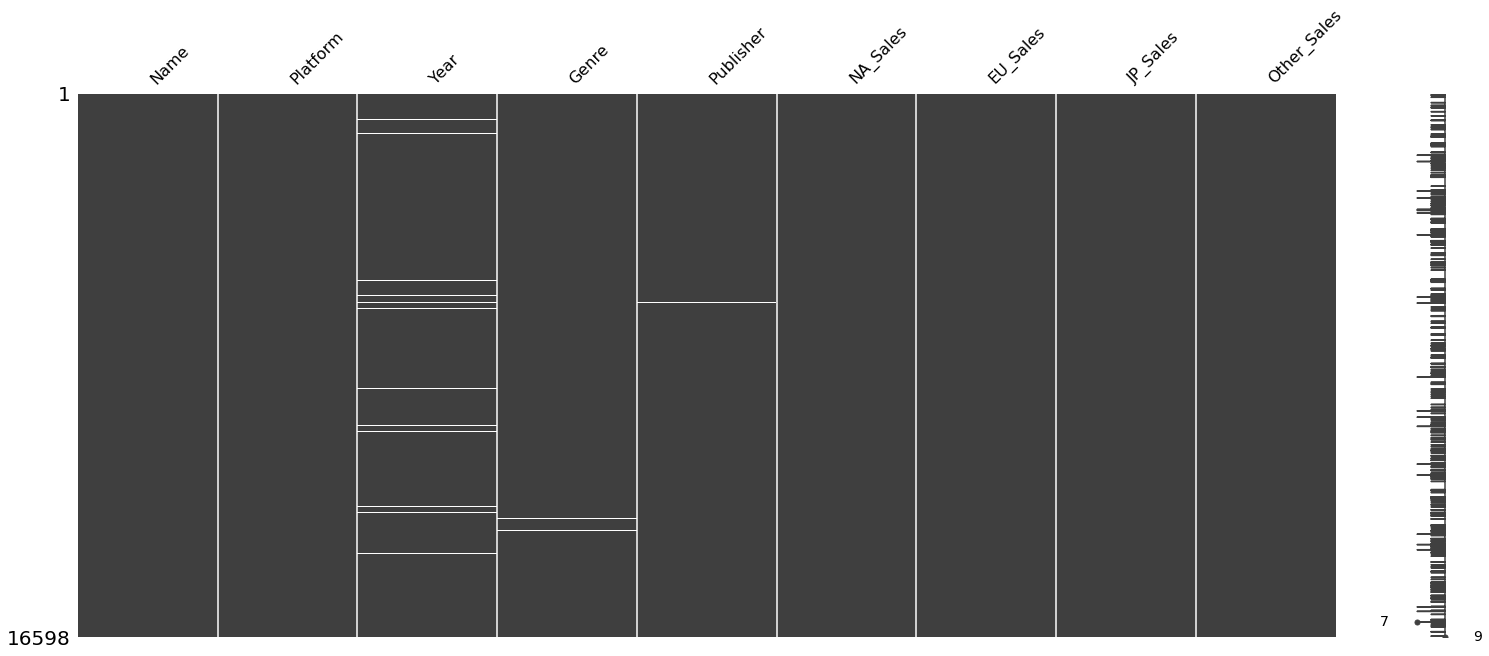

In [11]:
msno.matrix(df)

- 해당 결과를 통해서 Year는 무작위 적인 결측이 일어난 것을 파악해볼 수 있다. 하지만 Publisher와 Genre에선 무작위 적인 결측이라고 보기에 무리가 있기에, 이 둘을 중점적을 살펴보려고 한다.
- year에서 발생한 결측값은 원본 데이터의 비율에서 10%이하면, 삭제를 하는것이 좋아 보인다.

### 1) publisher에 결측값이 있는 데이터

In [12]:
pulisher_null_df = df.loc[df['Publisher'].isnull()]

In [13]:
pulisher_null_df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
273,UK Truck Simulator,PC,2010.0,Simulation,NaN,0.00,0.03,0.00,0.00
1314,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0.00,0.00
1561,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0.00,0.00
1790,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0.00,0.00
1880,Monster Hunter Frontier Online,PS3,NaN,Role-Playing,NaN,0.00,0.00,0.05,0.00
1962,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.00,0.01
2071,World of Tanks,X360,NaN,Shooter,NaN,0.00,0.03,0.00,0.00
2971,Chou Soujuu Mecha MG,DS,NaN,Simulation,NaN,0.00,0.00,0.06,0.00
3185,Action Man-Operation Extreme,PS,NaN,Action,NaN,0.05,0.03,0.00,0.01
3413,Dance with Devils,PSV,2016.0,Action,NaN,0.00,0.00,0.01,0.00


### pulisher_null_df에 속한 데이터 중 유의미한(큰) 데이터가 있는지, sales 기준으로 파악

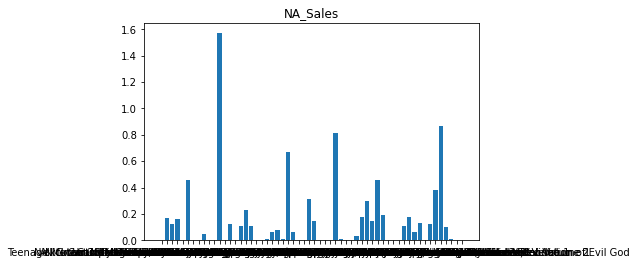

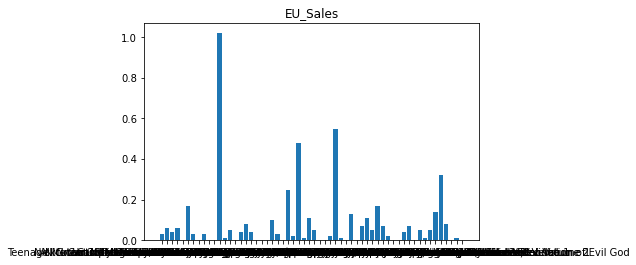

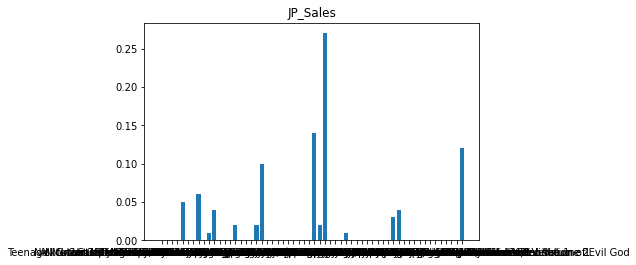

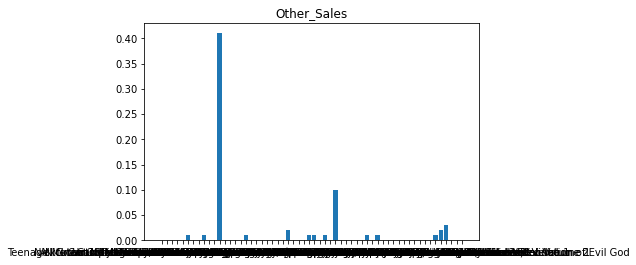

In [14]:
# NA_Sales
x = pulisher_null_df['Name']
y = pulisher_null_df['NA_Sales']
plt.bar(x, y)
plt.title('NA_Sales')
plt.show()

# EU_Sales
x = pulisher_null_df['Name']
y = pulisher_null_df['EU_Sales']
plt.bar(x, y)
plt.title('EU_Sales')
plt.show()

# JP_Sales
x = pulisher_null_df['Name']
y = pulisher_null_df['JP_Sales']
plt.bar(x, y)
plt.title('JP_Sales')
plt.show()

# Other_Sales
x = pulisher_null_df['Name']
y = pulisher_null_df['Other_Sales']
plt.bar(x, y)
plt.title('Other_Sales')
plt.show()

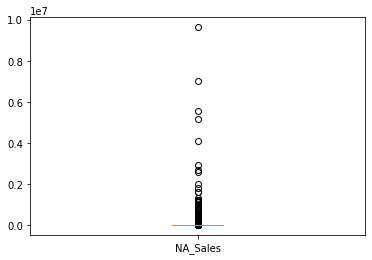

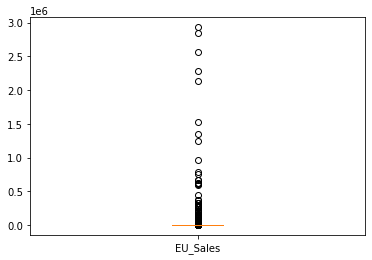

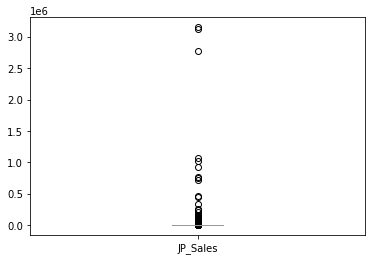

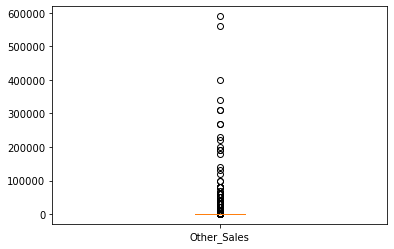

In [15]:
# 전체 데이터의 boxplot

fig, ax = plt.subplots()
ax.boxplot(df['NA_Sales'])
plt.xticks([1],['NA_Sales'])
plt.show()

fig, ax = plt.subplots()
ax.boxplot(df['EU_Sales'])
plt.xticks([1],['EU_Sales'])
plt.show()

fig, ax = plt.subplots()
ax.boxplot(df['JP_Sales'])
plt.xticks([1],['JP_Sales'])
plt.show()

fig, ax = plt.subplots()
ax.boxplot(df['Other_Sales'])
plt.xticks([1],['Other_Sales'])
plt.show()

- 전체그래프를 나타내었을 때, y축에 천만단위로표현 되는 것을 볼 수 있다. 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'이 네 컬럼의 그래프들에서 나타난 수치들 중 가장 큰 값이 1.6이기 때문에 sales에 영향을 크게 미치는 수치가 아니라고 판단 가능하다. 그렇기에 publisher 컬럼의 전처리 과정에서 결측값 '삭제'를 진행하였다.

In [17]:
df_new = df.loc[df['Publisher'].notna()]

In [18]:
df_new

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [19]:
df_new.isnull().sum()

Name             0
Platform         0
Year           249
Genre           50
Publisher        0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

- publisher가 결측값인 58개의 행이 삭제된 것을 볼 수 있다.

### 2) Genre에 결측값이 있는 데이터

In [20]:
genre_null_df = df_new.loc[df_new['Genre'].isnull()]

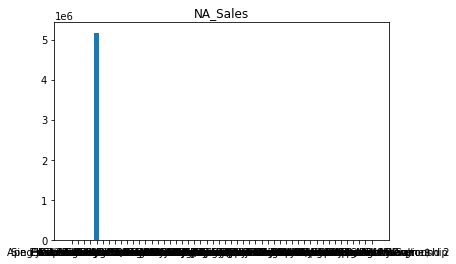

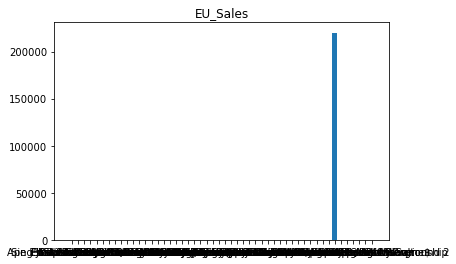

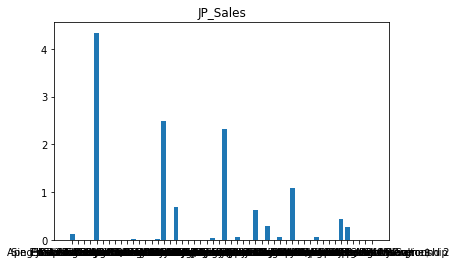

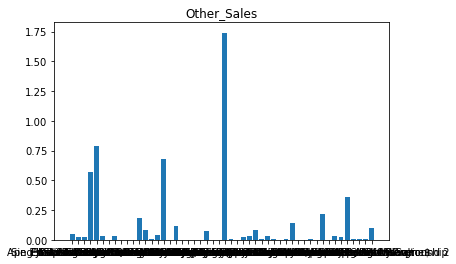

In [21]:
# NA_Sales
x = genre_null_df['Name']
y = genre_null_df['NA_Sales']
plt.bar(x, y)
plt.title('NA_Sales')
plt.show()

# EU_Sales
x = genre_null_df['Name']
y = genre_null_df['EU_Sales']
plt.bar(x, y)
plt.title('EU_Sales')
plt.show()

# JP_Sales
x = genre_null_df['Name']
y = genre_null_df['JP_Sales']
plt.bar(x, y)
plt.title('JP_Sales')
plt.show()

# Other_Sales
x = genre_null_df['Name']
y = genre_null_df['Other_Sales']
plt.bar(x, y)
plt.title('Other_Sales')
plt.show()

- NA_Sales에서 5000000이상, EU_Sales에서 200000이상의 값이 하나씩 나온 것을 볼 수 있다. JP_Sales과 Ohter_Sales에선 유의미한 수치가 나오지 않았기 떄문에 앞서 말한 두 값을 제외하고는 모두 삭제하기로 하였다.

In [60]:
# 조건을 걸어서 NA_Sales의 최댓값 위치와 EU_Sales 최댓값 위치를 찾아 데이터 반환
condition = (genre_null_df.NA_Sales == max(genre_null_df.NA_Sales)) | (genre_null_df.EU_Sales == max(genre_null_df.EU_Sales))

In [61]:
genre_null_df[condition]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1972,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170000.00,4.05,4.34,0.79
15212,James Bond 007: Nightfire,XB,2002.0,NaN,Electronic Arts,0.58,220000.00,0.00,0.03


- 해당 데이터는 게임 Pokemon X/Pokemon Y와 James Bond 007: Nightfire의 데이터임을 확인하였다.
- 이후 이 둘의 데이터는 제외한 후 삭제를 진행하였다.
- 이를 위해 장르를 찾아 직접 수기로 입력하였다.

- 먼저 데이터에서 쓰이는 장르 종류가 무엇이 있는지 살펴보았다.

In [62]:
df_new['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

- Pokemon X/Pokemon Y의 장르는 RPG임을 확인하였다. 이에 'Role-Playing'장르로 입력하기로하였다.
- 게임소개 링크: https://namu.wiki/w/%ED%8F%AC%EC%BC%93%EB%AA%AC%EC%8A%A4%ED%84%B0%20X%C2%B7Y
- James Bond 007: Nightfire의 장르는 shooter임을 확인하였다. 이에 'Shooter'장르로 입력하기로 하였다.
- 게임소개 링크: https://en.wikipedia.org/wiki/James_Bond_007:_Nightfire

In [63]:
# 포켓몬 장르 변경
df_new.loc[df_new['Name'] == 'Pokemon X/Pokemon Y', 'Genre'] = 'Role-Playing'

C:\Users\dhckd\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [64]:
# 제임스본드 장르 변경
df_new.loc[df_new['Name'] == 'James Bond 007: Nightfire', 'Genre'] = 'Shooter'

In [65]:
condition = ((df_new.Name == 'Pokemon X/Pokemon Y') | (df_new.Name == 'James Bond 007: Nightfire'))

In [66]:
df_new[condition]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1972,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,Nintendo,5170000.00,4.05,4.34,0.79
2562,James Bond 007: Nightfire,GC,2002.0,Shooter,Electronic Arts,0.60,0.16,0.00,0.02
4860,James Bond 007: Nightfire,PS2,2002.0,Shooter,Electronic Arts,1.45,1.29,0.12,0.46
9559,James Bond 007: Nightfire,GBA,2003.0,Shooter,Electronic Arts,0.10,0.04,0.00,0.00
15212,James Bond 007: Nightfire,XB,2002.0,Shooter,Electronic Arts,0.58,220000.00,0.00,0.03


- 포켓몬과 제임스본드의 장르 변경확인

#### 이제 Genre가 결측값인 행 제거

In [67]:
df_new = df_new.loc[df_new['Genre'].notna()]

In [68]:
df_new

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [69]:
df_new.isnull().sum()

Name             0
Platform         0
Year           249
Genre            0
Publisher        0
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

- Genre의 결측값 제거 확인

### 3) Year에 결측값이 있는 데이터

In [70]:
year_null_df = df_new.loc[df_new['Year'].isnull()]

In [71]:
# 원본 데이터와 year의 결측값 비율
len(year_null_df)/len(df)*100

1.5001807446680324

- year의 결측값 비율은 전체 데이터에 1.5%이다. 또한, 결측이 특정한 곳에서 발생한 것이 아니라 무작위적인 결측이 이루어진 것을 시각적으로 확인하였기에 삭제를 진행하도록 하였다.

In [72]:
df_new = df_new.loc[df_new['Year'].notna()]

In [73]:
df_new

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [74]:
df_new.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

- Year의 결측값 제거 확인

In [75]:
df_new

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


### * 본프로젝트 진행 중, Year컬럼에서 9.0, 11.0등의 값을 가진 데이터를 찾게 되었다. 그렇기에 해당 데이터들 또한 살펴보고 총 100개이기에 삭제를 진행하였다.

In [76]:
condition1 = df_new.Year < 1900
df_outiler_year = df_new.loc[condition1]
condition2 = df.Year > 1900
df_new = df_new.loc[condition2]

In [77]:
df_outiler_year

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
75,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03
82,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.10,0.07,0.00,0.01
214,NASCAR Unleashed,PS3,11.0,Racing,Activision,0.09,0.00,0.00,0.01
305,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0.00,0.02,0.00,0.00
769,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,0.53,0.41,0.00,0.14
...,...,...,...,...,...,...,...,...,...
15986,Sugoi Hebereke,SNES,94.0,Fighting,Sunsoft,0.00,0.00,0.02,0.00
16104,Fab 5 Soccer,DS,8.0,Sports,Destineer,0.01,0.00,0.00,0.00
16150,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,0.24,0.18,0.03,0.05
16395,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0.00,0.00


In [78]:
df_new

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


#### 결측값 처리 과정을 통해 만든 데이터를 새로 저장

In [79]:
df_new.to_csv("C:/Users/dhckd/Study/CodingWorld/Codestates/Projects/project1/dataset/new_data.csv")

- 저장 확인

In [80]:
df_n = pd.read_csv("C:/Users/dhckd/Study/CodingWorld/Codestates/Projects/project1/dataset/new_data.csv", index_col = 0)

In [81]:
df_n

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03
